# Répartition de particules entre deux compartiments

Comme vu en cours et en travaux dirigés, nous considérons ici un nombre $N_\mathrm{particules}$ de particules réparties entre deux compartiments identiques, dénomés "Gauche" et "Droite.

Nous allons alors nous intéresser à la probabilité $p(n)=P(N_\mathrm{gauche}=n)$ de trouver $n$ particules dans le compartiment de gauche.

## Modules nécessaires

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [29]:
import tools.gauchedroite as gd

## Prise en main

Nous avons créé une fonction 

    $ nouveautirage(Nparticules=10,Verbose=False)
    
qui effectue une répartion aléatoire de Nparticules entre les deux compartiments. La valeur de Nparticules par défaut est 10.

Si Verbose == False, alors la sortie de nouveautirage est un dictionnaire python donnant le nombre de particules dans chaque compartiment. Par exemple:
    
    {'Gauche': 5, 'Droite': 5})
 
Si Verbose == True et si Nparticules <= 100 , la sortie est un tuple comprenant une liste indiquant pour chaque particule le compartiment dans laquelle elle se trouve et le dictionnaire ci-dessous. Par exemple:

    $ nouveautirage(10,True)
    (['Gauche',
      'Droite',
      'Gauche',
      'Gauche',
      'Droite',
      'Droite',
      'Droite',
      'Gauche',
      'Gauche',
      'Droite'],
     {'Gauche': 5, 'Droite': 5})
    
Le résultat de nouveautirage peut facilement être représenté sous forme d'histogramme grâce à la fonction pyplot.bar de matplotlib.

In [40]:
gd.nouveautirage(10,True)

(['Droite',
  'Gauche',
  'Gauche',
  'Gauche',
  'Gauche',
  'Gauche',
  'Gauche',
  'Gauche',
  'Gauche',
  'Droite'],
 {'Gauche': 8, 'Droite': 2})

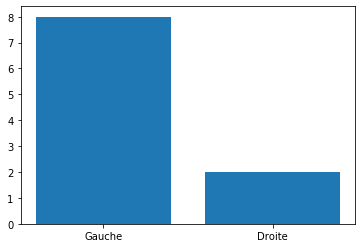

In [82]:
a=gd.nouveautirage(10)
plt.bar(a.keys(),a.values())
plt.show()

### A faire

Faites 10 tirages avec 10 particules et construisez sur votre cahier un histogramme du nombre de fois où une 
valeur $n$ de particules est obtenu.

## Probabilité de trouver $n$ particules dans le compartiment de gauche

Pour un nombre Nparticules de particules, nous allons effectuer Ntirages et construire un histogramme du nombre de fois où un nombre $n$ est trouvé dans ces tirages

In [47]:
# définition de Nparticules et Ntirages

Nparticules=100
Ntirages=1000

In [63]:
# on effectue Ntirage et on garde dans une liste pour chaque tirage le nombre de particules à gauche

NombresGauche=np.array([gd.nouveautirage(Nparticules).get("Gauche") for i in range(Ntirages)])
NombresGauche[0:100]

array([45, 45, 52, 51, 46, 49, 49, 57, 48, 49, 52, 46, 45, 51, 42, 52, 46,
       46, 45, 50, 59, 50, 58, 46, 39, 50, 52, 43, 51, 44, 46, 51, 48, 49,
       43, 52, 50, 47, 53, 42, 50, 52, 56, 62, 47, 48, 46, 51, 39, 43, 42,
       52, 50, 50, 52, 50, 52, 48, 54, 48, 50, 50, 46, 52, 47, 45, 63, 40,
       50, 49, 51, 49, 47, 43, 50, 48, 52, 48, 49, 53, 47, 48, 46, 62, 54,
       43, 50, 57, 48, 58, 39, 55, 61, 45, 47, 55, 57, 57, 41, 52])

In [64]:
# construction de l'histogramme
(distribution,n)=np.histogram(NombresGauche,bins=range(Nparticules+1))

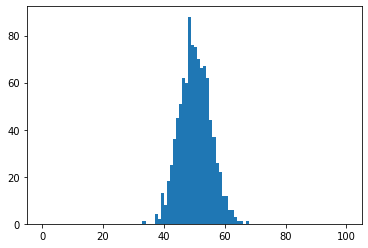

In [81]:
# représentation graphique
plt.hist(NombresGauche,bins=range(Nparticules+1))
plt.show()

## Expression analytique de $p(n)$

En travaux dirigés, vous avez démontrer que pour $N$ particules:
\begin{equation*}
p(n)=\frac{1}{2^N}\binom{N}{n}.
\end{equation*}

On peut alors s'attendre à trouver $N\mathrm{tirages}\times p(n)$ fois $n$ particules à gauche pour $N_\mathrm{tirages}$ tirages.

On peut comparer cette expression au résultat que nous avons obtenu par tirages aléatoires.

In [73]:
def p(n,Nparticules=10):
    p=sp.binom(Nparticules,n)*1./2.**Nparticules
    return p

Comparaison entre l'expression analytique et le résultat numérique

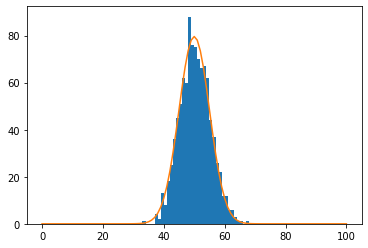

In [86]:
plt.hist(NombresGauche,bins=range(Nparticules+1))
n=np.arange(0,Nparticules+1)
plt.plot(n,p(n,Nparticules)*Ntirages)
plt.show()

### A faire

Jouer avec Nparticules et Ntirages pour observer l'évolution de la distribution de $n$.